In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
pd.options.display.max_rows = 30
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
properatti = pd.read_csv("properatti.csv")

In [3]:
properatti.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [4]:
#'price', 'currency','property_type','place_name','price_usd_per_m2', 'price_per_m2','state_name'
#'state_name'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2','surface_covered_in_m2'
#Descripcion del dataframe

print(properatti.columns)
print(properatti.shape)

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')
(121220, 26)


In [5]:
#Descripcion variable currency
print(properatti[["currency","price"]].groupby("currency").count())


          price
currency       
ARS       13219
PEN           2
USD       87587
UYU           1


,price
state_name,
Capital Federal,29018
Bs.As. G.B.A. Zona Norte,24058
Bs.As. G.B.A. Zona Sur,12085
Buenos Aires Costa Atlántica,9059
Córdoba,9038
Bs.As. G.B.A. Zona Oeste,7333
Santa Fe,5413
Buenos Aires Interior,1814
Mendoza,476


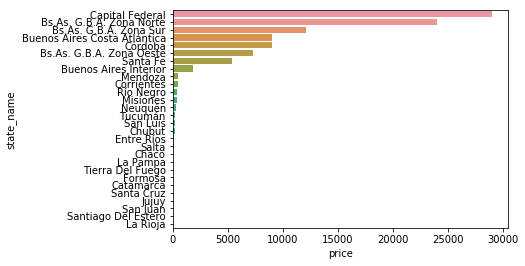

In [6]:
#Descripcion variable 'state_name'
y = properatti[['state_name','price']].groupby('state_name').count().sort_values(by="price",ascending=False)
sns.barplot(y.price,y.index)
y


In [7]:
#Nos quedamos solo con las zonas y las columnas pertinentes por el momento


columnas = ['price', 'currency','property_type','place_name','price_usd_per_m2', 'price_per_m2','state_name','price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2','surface_covered_in_m2']
properatti_ba = properatti[columnas]
properatti_ba_2 = properatti_ba[properatti_ba['state_name'] == "Capital Federal"]
properatti_ba_3 = properatti_ba[properatti_ba['state_name'] == "Bs.As. G.B.A. Zona Norte"]
properatti_ba_4 = properatti_ba[properatti_ba['state_name'] == "Bs.As. G.B.A. Zona Sur"]
properatti_ba_5 = properatti_ba[properatti_ba['state_name'] == "Buenos Aires Costa Atlántica"]
properatti_ba_6 = properatti_ba[properatti_ba['state_name'] == "Buenos Aires Interior"]
properatti_ba_7 = properatti_ba[properatti_ba['state_name'] == "Bs.As. G.B.A. Zona Oeste"]

properatti_ba_all = properatti_ba_2.append(properatti_ba_3)
properatti_ba_all = properatti_ba_all.append(properatti_ba_4)
properatti_ba_all = properatti_ba_all.append(properatti_ba_5)
properatti_ba_all = properatti_ba_all.append(properatti_ba_6)
properatti_ba_all = properatti_ba_all.append(properatti_ba_7)

properatti_ba_all.shape



(93447, 11)

In [8]:
#Nos quedamos solo con los barrios que tienen mas de 30 propiedades
#Con las propiedades cuyo precio es menor a un millon de dolares
#Y cuyo precio por metros cuadrados sea mayor a 500 y menor a 5000

properatti_ba_all_sin_ol = properatti_ba_all[(properatti_ba_all['price_usd_per_m2'] >500)&(properatti_ba_all['price_usd_per_m2'] < 5000) & (properatti_ba_all['price_aprox_usd'] < 1000000)]

properatti_ba_all_sin_ol = properatti_ba_all_sin_ol.dropna()

aux = properatti_ba_all_sin_ol[["price_usd_per_m2","place_name"]].groupby("place_name").count()>30

aux2 = properatti_ba_all_sin_ol["place_name"].apply(lambda x: aux.loc[x])

properatti_ba_all_sin_ol = properatti_ba_all_sin_ol[aux2.price_usd_per_m2]

medias_por_zona = properatti_ba_all_sin_ol.groupby("place_name").mean().sort_values("price")





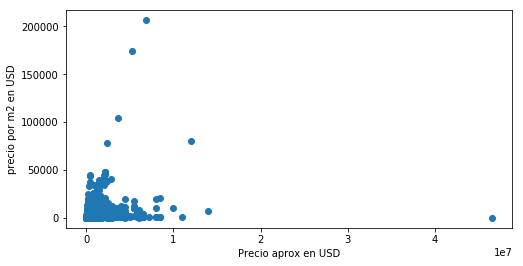

In [9]:
# gráfico de dispersión para identificar outliers a partir de dos variables determinantes para toda la provincia de Buenos Aires
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(properatti_ba_all['price_aprox_usd'], properatti_ba_all['price_usd_per_m2'])
ax.set_xlabel('Precio aprox en USD')
ax.set_ylabel('precio por m2 en USD')
plt.show()

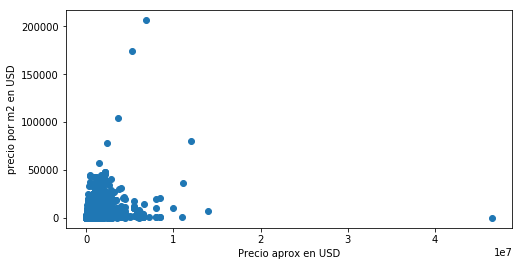

In [10]:
# gráfico de dispersión para identificar outliers a partir de dos variables determinantes para todo el dataset
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(properatti['price_aprox_usd'],(properatti['price_usd_per_m2']))
ax.set_xlabel('Precio aprox en USD')
ax.set_ylabel('precio por m2 en USD')
plt.show()

In [11]:
#quitamos outlyers para price usd m2 y precio aprox en USD
properatti_ba_all_sin_ol = properatti_ba_all[(properatti_ba_all['price_usd_per_m2'] < 5000) & (properatti_ba_all['price_aprox_usd'] < 600000)]
properatti_ba_all_sin_ol.shape

(53491, 11)

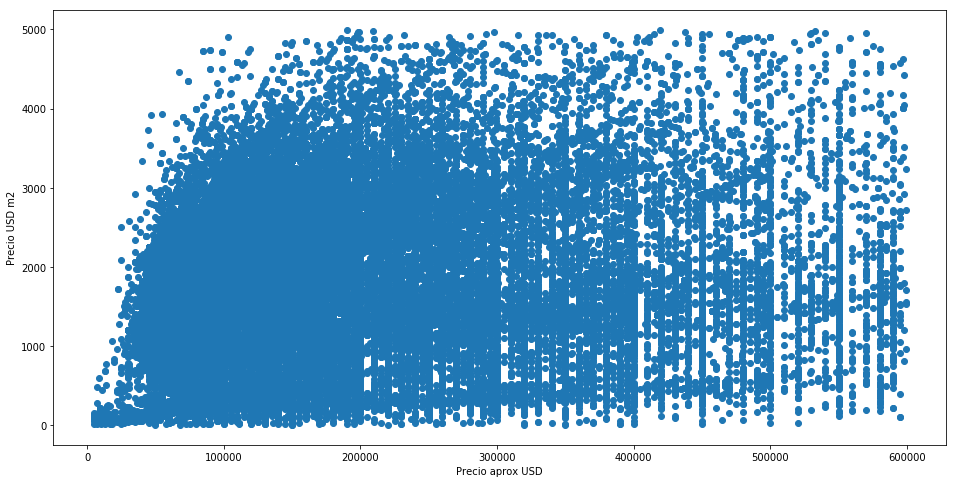

In [12]:
# gráfico de dispersión viendo precio y m2, para todo el dataset, sin discriminar entre ARS y USD.
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(properatti_ba_all_sin_ol['price_aprox_usd'], properatti_ba_all_sin_ol['price_usd_per_m2'])
ax.set_xlabel('Precio aprox USD')
ax.set_ylabel('Precio USD m2')
plt.show()

In [13]:
#quitamos outlyers para price usd m2 y precio aprox en USD
properatti_ba_all_sin_ol = properatti_ba_all[(properatti_ba_all['price_usd_per_m2'] < 5000) & (properatti_ba_all['price_aprox_usd'] < 600000)]

In [14]:
properatti_ba_all.describe()


,price,price_usd_per_m2,price_per_m2,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2
count,8.336700e+04,58996.000000,7.438000e+04,8.336700e+04,8.336700e+04,66703.000000,81960.000000
mean,3.506093e+05,2238.373639,5.097261e+03,4.420423e+06,2.505270e+05,225.413490,134.876733
std,8.802448e+05,2723.896830,2.655287e+04,6.472821e+06,3.668464e+05,1371.572503,786.393898
min,5.000000e+03,1.000000,1.510204e+00,8.738350e+04,4.952450e+03,0.000000,0.000000
25%,1.020000e+05,1277.777778,1.550000e+03,1.729161e+06,9.800000e+04,50.000000,46.000000
50%,1.660000e+05,1909.090909,2.146574e+03,2.787831e+06,1.580000e+05,87.000000,75.000000
75%,3.200000e+05,2583.333333,3.000000e+03,5.028682e+06,2.850000e+05,211.000000,155.000000
max,1.000000e+08,206333.333333,4.000000e+06,8.212711e+08,4.654544e+07,200000.000000,187000.000000


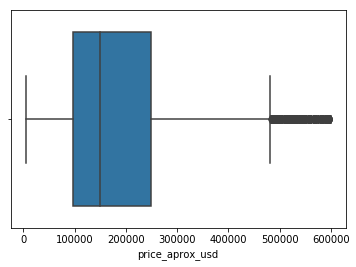

In [15]:
sns.boxplot(properatti_ba_all_sin_ol.price_aprox_usd) 


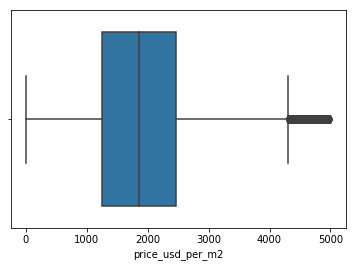

In [16]:
sns.boxplot(properatti_ba_all_sin_ol.price_usd_per_m2) 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


1882.0872609728854

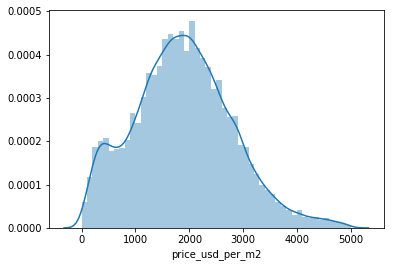

In [17]:
sns.distplot(properatti_ba_all_sin_ol.price_usd_per_m2)
properatti_ba_all_sin_ol.price_usd_per_m2.mean()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


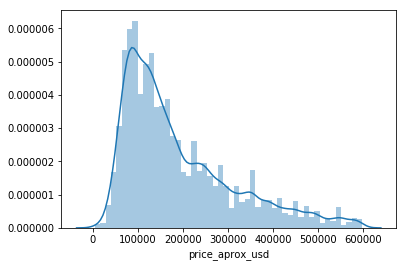

In [18]:
sns.distplot(properatti_ba_all_sin_ol.price_aprox_usd)

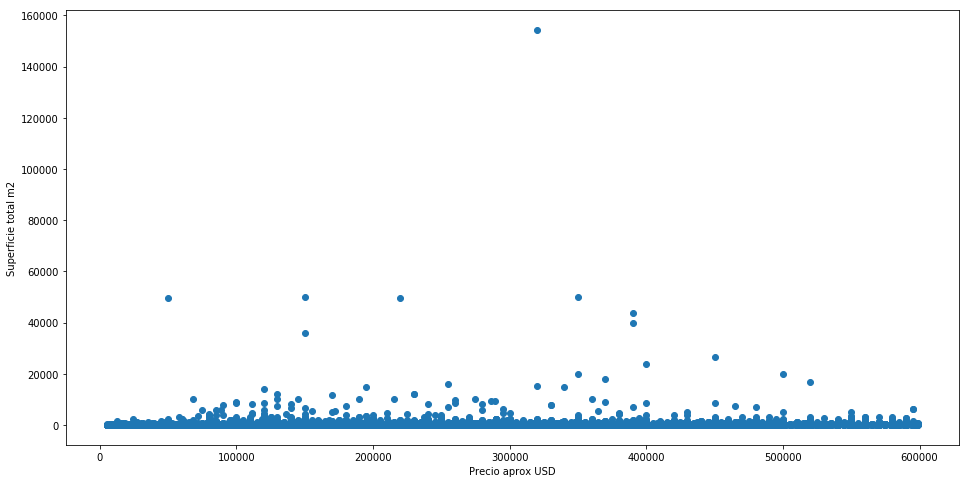

In [19]:
# gráfico de dispersión viendo Superficie total y precio en USD. 
fig, ax = plt.subplots(figsize=(16,8)) 
ax.scatter(properatti_ba_all_sin_ol['price_aprox_usd'], properatti_ba_all_sin_ol['surface_total_in_m2']) 
ax.set_xlabel('Precio aprox USD') 
ax.set_ylabel('Superficie total m2') 
plt.show()



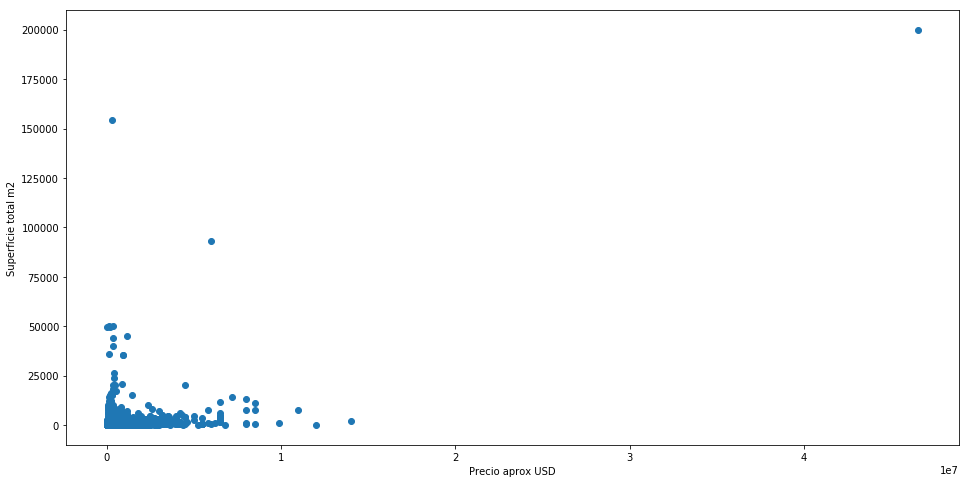

In [20]:



# gráfico de dispersión viendo Superficie total y precio en USD. 
fig, ax = plt.subplots(figsize=(16,8)) 
ax.scatter(properatti_ba_all['price_aprox_usd'], properatti_ba_all['surface_total_in_m2']) 
ax.set_xlabel('Precio aprox USD') 
ax.set_ylabel('Superficie total m2') 
plt.show()


In [21]:
def Tasador(propiedad,media_zona):
    
    #Dos parametros de entrada
    #IN:
    #propiedad
    #Serie (una de las filas del dataframe original u otro con los mismos tipos de entrada)
    
    #media_zona
    #Dataframe con las medias de los valores del dataframe original ya filtrado, agrupados por zonas.
    #Se le quitaron los valores nan, y se tienen mas de 30 muestras
    
    #Un parametro de salida
    #OUT:
    #propiedad: price_usd_per_m2_tasado
    #La serie con un nuevo valor: precio en dolares por metro cuadrado tasado
    
    
    
    
    #Pregunta 1: La zona de la propiedad, ¿la puedo encontrar en las medias por zona?
    #Pregunta 2: La propiedad ¿tiene precio definido?
    #Pregunta 3: La propiedad, ¿tiene una cantidad de metros definida?
    
    #Si no puedo hacer una aproximacion del sitio donde esta la propiedad, 
    #se tasa por el promedio de los promedios de de todas las zonas.
    
    
    
    
    
    if media_zona.index.contains(propiedad.place_name): 
        
        if not np.isnan(propiedad.price): 
            
            if not np.isnan(propiedad.surface_total_in_m2):
                propiedad["price_per_m2_tasado"] = propiedad.price / propiedad.surface_total_in_m2
            elif not np.isnan(propiedad.surface_covered_in_m2):
                propiedad["price_per_m2_tasado"] = propiedad.price / propiedad.surface_covered_in_m2
            else:
                propiedad["price_per_m2_tasado"] = propiedad.price / media_zona.loc[propiedad.place_name].loc["surface_total_in_m2"]
        else:
            if not np.isnan(propiedad.surface_total_in_m2):
                propiedad["price_per_m2_tasado"] = media_zona.loc[propiedad.place_name].loc["price"] / propiedad.surface_total_in_m2
            elif not np.isnan(propiedad.surface_covered_in_m2):
                propiedad["price_per_m2_tasado"] = media_zona.loc[propiedad.place_name].loc["price"] / propiedad.surface_covered_in_m2
            else:
                propiedad["price_per_m2_tasado"] = media_zona.loc[propiedad.place_name].loc["price_usd_per_m2"]
    else: 
          
        propiedad["price_per_m2_tasado"] = media_zona.mean().loc["price_usd_per_m2"]
    
        
    
    return propiedad
